In [9]:
from __future__ import absolute_import, division, print_function

# tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

1.13.1


build a classification model to classify articles of clothing by learning from Fashion MNIST dataset

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [7]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

our features consist of a 28 * 28 pixel value where each pixel value ranges from 0-255. The labels consists of value from 0-9 representing the class of the clothes

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### preprocessing of data

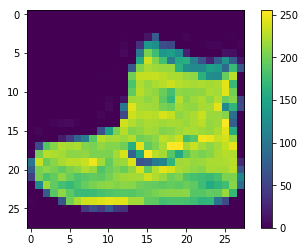

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

we can see that the pixel value range from 0-255. have such a scale in our trainig set will make the convergence slower. hence we can proprocess the data and the value to a scale of 0-1

In [12]:
train_images /= 255
test_images /= 255

ValueError: output array is read-only

In [13]:
print(train_images.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


we are getting the above error our array is not writable. we will change it.

In [14]:
train_images.setflags(write=1)
test_images.setflags(write=1)

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
def display_image(X, y):
    fig, axes = plt.subplots(4, 4, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap='gray')
        ax.set_title(class_names[y[i]])
        ax.set(xticks=[], yticks=[])
    

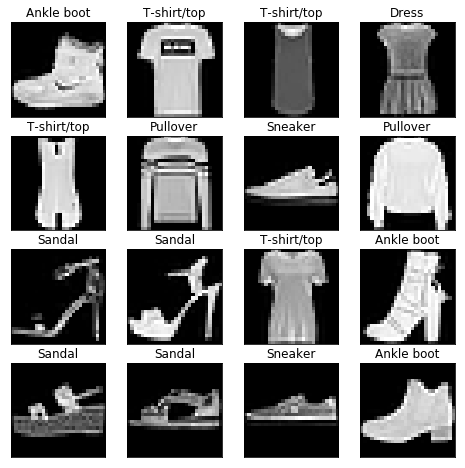

In [23]:
display_image(train_images[:16], train_labels[:16])

#### training model

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


the first layer in our model transforms the format of the image from a 2d-array to (28*28= 784) 1-d array.
the next two layers are densly connected of fully connected , neural networks. the first layer has 128 nodes or neurons. the second layer has 10 nodes which gives a array of 10 probability scores that sum up to 1.

#### compiling the model

we have to provide the loss function, optimizer and metrics.

    - loss function :   measure how accurate the model is during training.we want to minimize this function
    - optimizer : to update the model based on the dataset and its loss function
    - metrics : a metrics to monitor training and testing steps.

In [25]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#### training the model

In [26]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.4964 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.3751 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 22s 365us/sample - loss: 0.3359 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 21s 350us/sample - loss: 0.3120 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 23s 376us/sample - loss: 0.2944 - acc: 0.8910


#### evaluate the model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}, test accuracy : {test_acc}")

10000/10000 [==============================] - 1s 78us/sample - loss: 0.3491 - acc: 0.8739
test loss : 0.3490942174315453, test accuracy : 0.8738999962806702


#### make predictions

In [29]:
pred = model.predict(test_images)

In [30]:
pred[0]

array([1.2166775e-05, 3.6779180e-09, 9.5065580e-08, 1.1513208e-07,
       1.9221136e-06, 2.0810564e-03, 1.3971463e-06, 1.3464363e-02,
       7.7433333e-06, 9.8443109e-01], dtype=float32)

a array of 10 classes probabilities that the image may belong to

In [32]:
np.argmax(pred[0])

9

In [34]:
test_labels[0]

9